In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_Forest_Fire_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
# Drop day, month, and year as we are trying to predict 'FWI' and for that day, month , year are not useful.
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# In df['Classes'] there are two values 'fire' and 'not fire' but the names are written with multiple spaces making multiple values instead of 2. Lets handle that

df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
# Create independent and dependent feature
X = df.drop('FWI', axis=1)
y = df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [13]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
print(f'The total size of dataset is {X.shape} from which the training dataset is 75% i.e. {X_train.shape} and testing dataset is 25% i.e. {X_test.shape}')

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

The total size of dataset is (243, 11) from which the training dataset is 75% i.e. (182, 11) and testing dataset is 25% i.e. (61, 11)
X train shape: (182, 11)
X test shape: (61, 11)
y train shape: (182,)
y test shape: (61,)


In machine learning, building a model isn't just about feeding in data; it's about feeding in the *right* data. Feature selection and multicollinearity are two critical concepts that help you prune your dataset for better performance and interpretability.

---

#### 1. Core Concepts

##### What is Feature Selection?

**Feature Selection** is the process of choosing a subset of the most relevant variables for use in model construction. Think of it as "quality over quantity." By removing irrelevant or redundant data, you:

* **Reduce Overfitting:** Less noise means the model generalizes better.
* **Improve Accuracy:** Focusing on high-impact variables often boosts performance.
* **Speed up Training:** Fewer variables mean less computational work.

### What is Multicollinearity?

**Multicollinearity** occurs when two or more independent variables (features) are highly correlated with each other.

* **The Problem:** In a regression model, if Feature A and Feature B move together, the model can't tell which one is actually causing the change in the target variable. This makes the model's coefficients unstable and difficult to interpret.
* **The "Redundancy" Rule:** If you have two features that tell the same story (e.g., "Weight in kg" and "Weight in lbs"), you only need one.

---

#### 2. Feature Selection Based on Correlation

Using correlation is a **Filter Method** for feature selection. It involves looking at how features relate to the target and how they relate to each other.

##### Step 1: Feature vs. Target Correlation

You want to keep features that have a **high correlation** with your target variable.

* **Positive Correlation:** As the feature increases, the target increases.
* **Negative Correlation:** As the feature increases, the target decreases.
* **Action:** Features with a correlation near zero (e.g., between  and ) are likely "noise" and can often be dropped.

##### Step 2: Feature vs. Feature Correlation (Solving Multicollinearity)

You want to remove features that are highly correlated with **each other**.

1. **Generate a Correlation Matrix:** Usually using Pearson's Correlation ().
2. **Identify Pairs:** Look for pairs with a correlation coefficient  or .
3. **Drop one:** If Feature A and Feature B are  correlated, drop the one that has a lower correlation with the target variable.

##### Step 3: Beyond Pairwise (VIF)

Sometimes, one feature is correlated with a *combination* of others, which a simple matrix might miss. We use the **Variance Inflation Factor (VIF)** to detect this:

* **VIF = 1:** No correlation.
* **VIF > 5 or 10:** High multicollinearity; the feature is a candidate for removal.


*(Where  is the R-squared value obtained by regressing feature  against all other features.)*


```

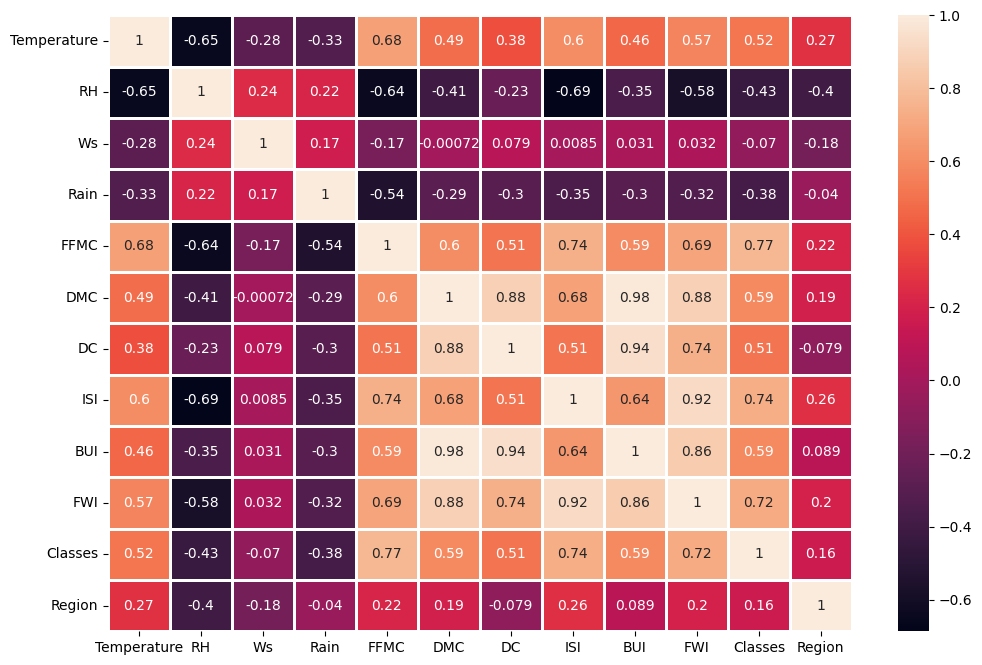

In [16]:
# Now, lets do feature selection based on correlation
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, linecolor='white', linewidths=2)
plt.show()

In [17]:
# Get the columns that with correlation above 85%. Note: In this case we are taking a random threshold of 85% but in real life an domain expert gives us this "threshld"

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [18]:
corr_features = correlation(X_train, 0.85)

In [19]:
# Let's remove 'BUI' and 'DC' because correlation is more than 85%
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [20]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


In [21]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


In [22]:
# Lets do feature scaling and standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

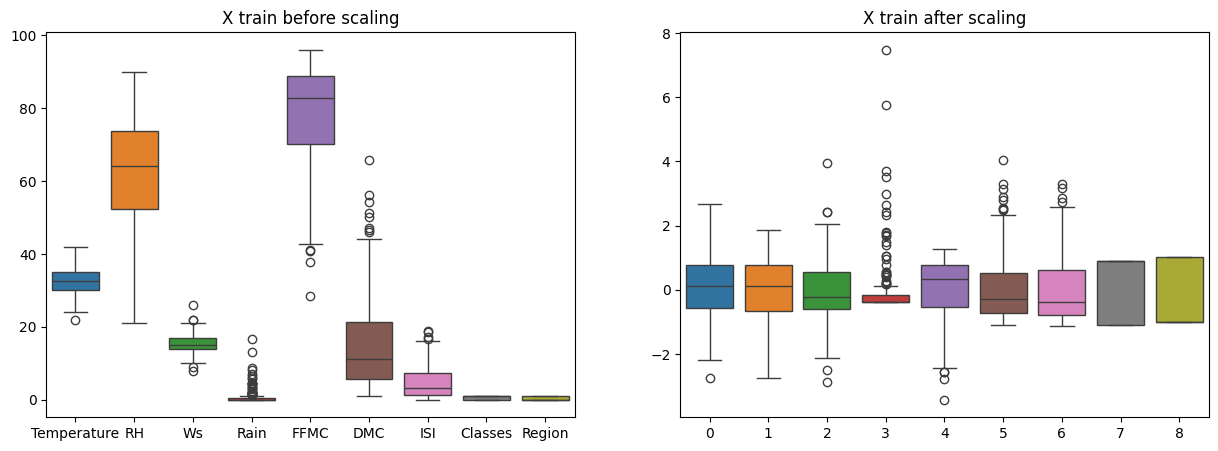

In [24]:
# Plot box plots to understand effect of standard scaling
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X train before scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X train after scaling')

plt.show()

### Model Training 

**1. Linear Regression:**

Mean Absolute Error: 0.546823646524997
R2 score: 0.9847657384266951


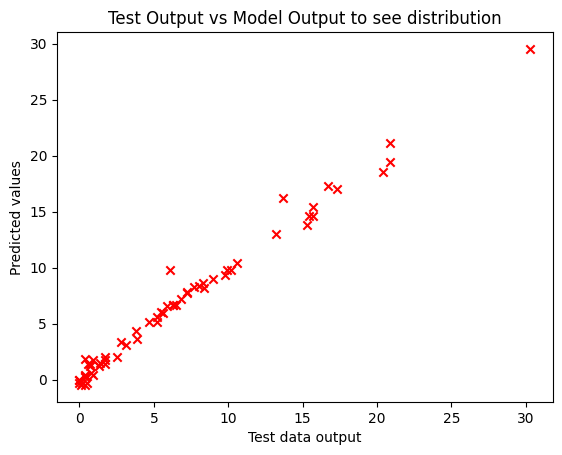

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# create instance of LinearRegression model
linreg = LinearRegression()

# Fit data into model, scaled X_train_scaled (input feaute) and y_train (output feature)
linreg.fit(X_train_scaled, y_train)

# the model will get trained on training data basically on X_train_scaled and y_train. Now predict the values for X_test (the unseen data we kept from model)
y_pred = linreg.predict(X_test_scaled)

# Calculate cost function go calculate model accuracy in relation with y_test (testing output feature) and y_pred (predicted output feature)
mae = mean_absolute_error(y_test, y_pred)

# calculate r2 score of the same to calculate model accuracy
score = r2_score(y_test, y_pred)

# Print model accuracy's with mae and r2
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {score}')

# Plot the test data (unseen/output) and predicted (output) to see what distribution out model follows
plt.scatter(y_test, y_pred, color='red', marker='x')
plt.title('Test Output vs Model Output to see distribution')
plt.xlabel('Test data output')
plt.ylabel('Predicted values')
plt.show()

*Visual Summary:*

* Linearity: The points form a tight, straight cluster. This confirms that the relationship between your features and the target variable is indeed linear, making LinearRegression an appropriate choice.

* Homoscedasticity: The "spread" of the points remains relatively consistent as the values increase, though there is a slight increase in variation at the higher end (around the 15–20 range).

---

**2. Lasso Regression:**

Lasso MAE: 1.133175994914409
Lasso R2 score: 0.9492020263112388


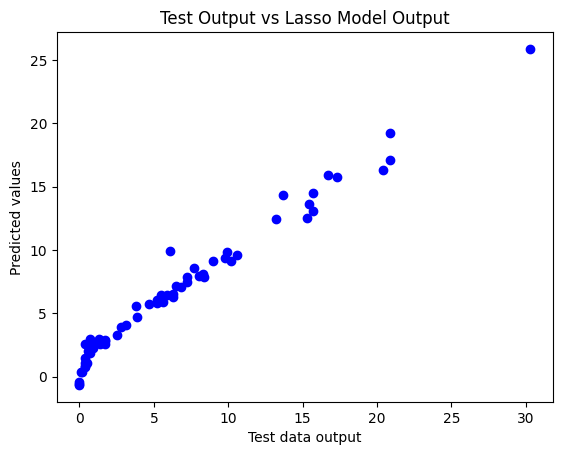

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize Lasso (L1 Regularization). 
# This adds a penalty to the coefficients to prevent overfitting and perform feature selection.
lasso = Lasso(alpha=1.0) 

# Fit the model using scaled training data
lasso.fit(X_train_scaled, y_train)

# Predict values for the unseen test set
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the average absolute magnitude of the errors
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Determine how well the model explains the variance (R2 score)
score_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso MAE: {mae_lasso}')
print(f'Lasso R2 score: {score_lasso}')

# Visualize predicted vs. actual values to check for linearity and outliers
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.title('Test Output vs Lasso Model Output')
plt.xlabel('Test data output')
plt.ylabel('Predicted values')
plt.show()

*Visual Summary:*

* Reduced Variance: The points in this plot appear slightly more condensed toward the center line compared to the standard linear regression. This suggests that the L1 regularization is effectively dampening the influence of less important features or noise.

* Consistency at the High End: In the previous plot, predictions near the 20–30 range had slightly more "wiggle." Lasso appears to have stabilized these higher-value predictions, making the trend more uniform across the entire scale.

---

**3. Ridge Regression:**

Ridge MAE: 0.5642305340105691
Ridge R2 score: 0.9842993364555513


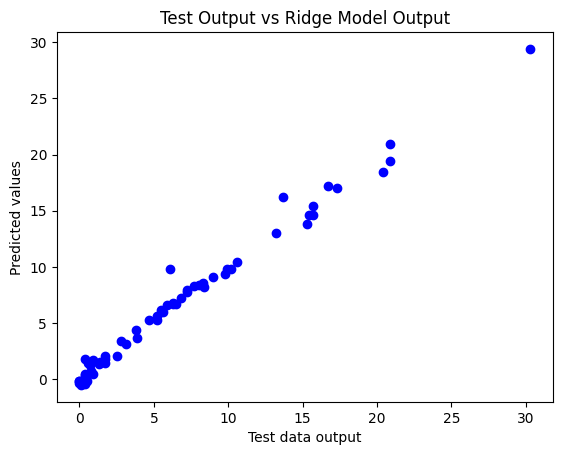

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize Lasso (L2 Regularization). 
ridge = Ridge() 

# Fit the model using scaled training data
ridge.fit(X_train_scaled, y_train)

# Predict values for the unseen test set
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate the average absolute magnitude of the errors
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Determine how well the model explains the variance (R2 score)
score_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge MAE: {mae_ridge}')
print(f'Ridge R2 score: {score_ridge}')

# Visualize predicted vs. actual values to check for linearity and outliers
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.title('Test Output vs Ridge Model Output')
plt.xlabel('Test data output')
plt.ylabel('Predicted values')
plt.show()

###### Why Ridge Performed Best

The reason MAE dropped back down (from 1.15 in Lasso to 0.56 in Ridge) while R² increased to 98% is due to how Ridge handles specific dataset:

* L2 Regularization (Shrinkage): Unlike Lasso, which deletes features (L1), Ridge (L2) keeps all features but shrinks their coefficients toward zero. This is perfect if most of features are actually useful and you just needed to reduce the "noise" or impact of multicollinearity.

* Handling Correlation: Ridge is historically better than Lasso when features are highly correlated with each other. It distributes the weight among them rather than picking one and discarding the rest.

* The "Goldilocks" Fit: Visually, the Ridge plot shows the tightest clustering yet. The points are nearly a perfect 45-degree line, meaning error is consistently low across both small and large values.

---

**4. ElasticNet Regression:**

ElasticNet MAE: 1.8822353634896
ElasticNet R2 score: 0.8753460589519703


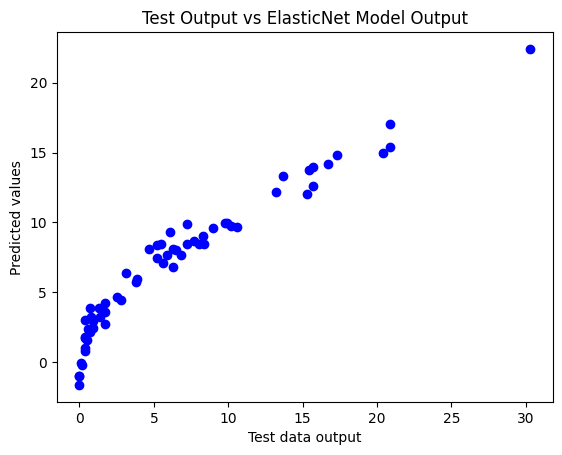

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize Lasso (L2 Regularization). 
elastic = ElasticNet() 

# Fit the model using scaled training data
elastic.fit(X_train_scaled, y_train)

# Predict values for the unseen test set
y_pred_elastic = elastic.predict(X_test_scaled)

# Evaluate the average absolute magnitude of the errors
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

# Determine how well the model explains the variance (R2 score)
score_elastic = r2_score(y_test, y_pred_elastic)

print(f'ElasticNet MAE: {mae_elastic}')
print(f'ElasticNet R2 score: {score_elastic}')

# Visualize predicted vs. actual values to check for linearity and outliers
plt.scatter(y_test, y_pred_elastic, color='blue')
plt.title('Test Output vs ElasticNet Model Output')
plt.xlabel('Test data output')
plt.ylabel('Predicted values')
plt.show()

* points are more "scattered" away from the diagonal line than they were with Ridge. This visual spread correspondents directly to that lower R² score.

---

#### Hyperparameter Tuning:

*Q. Is Hyperparamter Tuning == Cross Validation ?**

Not exactly—they are actually **partners**, not the same thing.

Think of it this way:

* **Hyperparameter Tuning** is the **Goal** (finding the best settings).
* **Cross-Validation** is the **Method** (the way you measure how good those settings are).

##### 1. The Core Difference

| Concept | Simple Analogy | Technical Definition |
| --- | --- | --- |
| **Hyperparameter Tuning** | Trying on different sized shoes to find the best fit. | The process of selecting the best values for parameters like `alpha` or `l1_ratio`. |
| **Cross-Validation** | Walking around in each pair for a few miles to make sure they don't hurt. | A resampling technique that rotates which part of your data is used for "training" and which is used for "testing." |

---

##### 2. Why we use them together

If you just "tune" your hyperparameters using a single train/test split, you might get lucky. Maybe that specific test set was just really easy for your model. If you change your settings until the score looks perfect on that one test set, you are **overfitting to the test set**.

**Cross-Validation** prevents this by:

1. Splitting your data into  "folds" (usually 5 or 10).
2. Training the model on 4 folds and testing on the 5th.
3. Repeating this 5 times so every data point gets a chance to be the "test set."
4. Averaging the scores.

##### Summary

* **Tuning** = "Let's try Alpha 0.1, 1.0, and 10.0."
* **Cross-Validation** = "Let's test each of those 5 different times on different data slices to be sure."

---

In scikit-learn, **LassoCV** and **RidgeCV** are specialized versions of the standard Lasso and Ridge models. They are designed to automate the process of **Hyperparameter Tuning** and **Cross-Validation** in a single, efficient step.

Think of them as "Auto-Pilot" versions of your models. Instead of you manually trying different `alpha` values, these models do it for you.

---

#### 1. RidgeCV (Ridge + Cross-Validation)

`RidgeCV` is built to find the best `alpha` (regularization strength) for your Ridge model.

* **How it works:** You provide a list of potential alphas (e.g., `[0.1, 1.0, 10.0]`). The model runs a cross-validation loop internally, tests each one, and keeps the one that gives the best score.
* **The Secret "Efficiency":** By default, `RidgeCV` uses a mathematical trick called **Generalized Cross-Validation (GCV)**. This allows it to perform Leave-One-Out Cross-Validation (LOOCV) almost as fast as a single model fit. It is much faster than running a standard `GridSearchCV`.
* **When to use:** Use this when you want the high accuracy of Ridge but aren't sure how much "penalty" (alpha) your data needs.

---

#### Practical: 

Mean Absolute Error: 0.5642305340105691
R2 Score: 0.9842993364555513


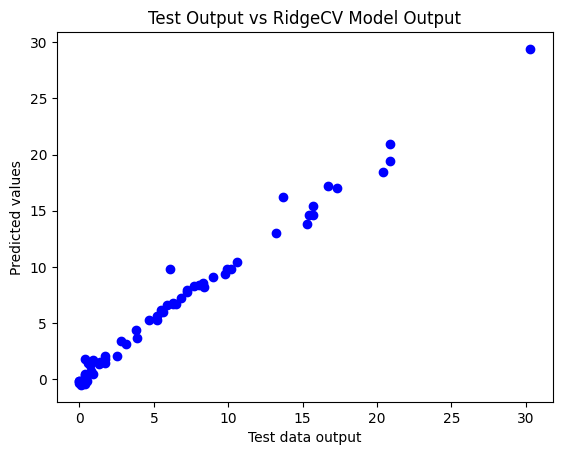

In [29]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

ridgecv = RidgeCV(cv = 5)

ridgecv.fit(X_train_scaled, y_train)

y_pred = ridgecv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

# Visualize predicted vs. actual values to check for linearity and outliers
plt.scatter(y_test, y_pred, color='blue')
plt.title('Test Output vs RidgeCV Model Output')
plt.xlabel('Test data output')
plt.ylabel('Predicted values')
plt.show()

In [30]:
print(f"Best Alpha: {ridgecv.alpha_}")
print(f"All values of alphas used to train: {ridgecv.alphas}")
ridgecv.get_params()

Best Alpha: 1.0
All values of alphas used to train: (0.1, 1.0, 10.0)


{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

---

#### 2. LassoCV (Lasso + Cross-Validation)

`LassoCV` automates the search for the best alpha specifically for Lasso models.

* **How it works:** Unlike Ridge, Lasso doesn't have a "shortcut" for cross-validation. `LassoCV` performs an iterative search along a "regularization path." It starts with a very high alpha (where all coefficients are zero) and slowly lowers it, testing the model at various points along the way.
* **Internal Splits:** It usually defaults to 5-fold cross-validation. It splits your data into 5 parts, trains on 4, and validates on the 5th, repeating this for every alpha it tests.
* **When to use:** Use this when you want Lasso to automatically handle **feature selection** for you while ensuring the alpha is tuned perfectly so you don't lose too much accuracy.

---

#### Practical:

Mean Absolute Error: 0.6199701158263431
R2 Score: 0.9820946715928275


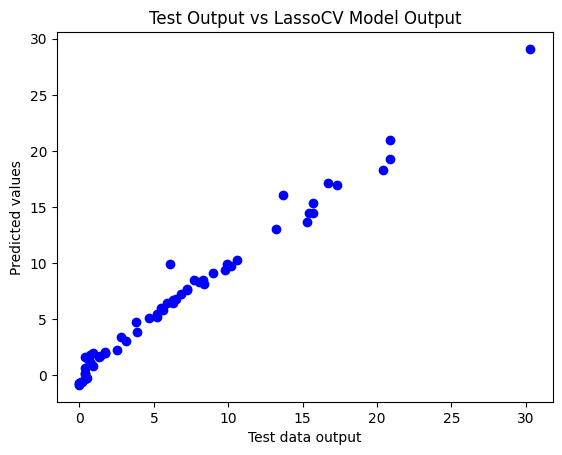

In [31]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score

lassocv = LassoCV(cv = 5)

lassocv.fit(X_train_scaled, y_train)

y_pred = lassocv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

# Visualize predicted vs. actual values to check for linearity and outliers
plt.scatter(y_test, y_pred, color='blue')
plt.title('Test Output vs LassoCV Model Output')
plt.xlabel('Test data output')
plt.ylabel('Predicted values')
plt.show()

In [32]:
print(f"Best Alpha: {lassocv.alpha_}")
print(f"All values of alphas used to train: {lassocv.alphas_}")
lassocv.get_params()

Best Alpha: 0.05725391318234408
All values of alphas used to train: [7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0.0231135  0.0215

{'alphas': 'warn',
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

---

#### 3. ElasticNetCV

`ElasticNetCV` is excellent because it has two things to tune: `alpha` (the total penalty) and `l1_ratio` (the balance between Lasso and Ridge).

#### Practical:

Mean Absolute Error: 0.6575946731430901
R2 Score: 0.9814217587854941


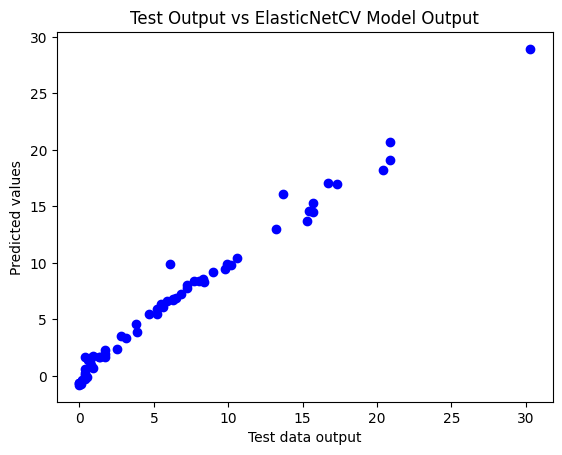

In [33]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score

elasticCv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv = 5)

elasticCv.fit(X_train_scaled, y_train)

y_pred = elasticCv.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

# Visualize predicted vs. actual values to check for linearity and outliers
plt.scatter(y_test, y_pred, color='blue')
plt.title('Test Output vs ElasticNetCV Model Output')
plt.xlabel('Test data output')
plt.ylabel('Predicted values')
plt.show()

In [34]:
print(f"Best Alpha: {elasticCv.alpha_}")
print(f"Best value for l1 regularization: {elasticCv.l1_ratio_}")

Best Alpha: 0.04311146156383891
Best value for l1 regularization: 0.5


---

#### Pickle the Machine Learning models, preprocessing model and StandardScalar

In [35]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [36]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [37]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))

# for the specific model we chose Ridge mainly because it has an accuracy close to 98%.
pickle.dump(ridge, open('ridge.pkl', 'wb'))